In [ ]:
import pandas as pd

In [ ]:
#Reading csv file containing Apple's stock market data
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-28 00:00:00+00:00,113.95,114.64,113.43,113.69,29641085,26.711906,26.873654,26.590009,26.650958,118564340,0.0,1.0
1,AAPL,2016-09-29 00:00:00+00:00,112.18,113.80,111.80,113.16,35886990,26.296987,26.676744,26.207908,26.526716,143547960,0.0,1.0
2,AAPL,2016-09-30 00:00:00+00:00,113.05,113.37,111.80,112.46,36379106,26.500930,26.575944,26.207908,26.362624,145516424,0.0,1.0
3,AAPL,2016-10-03 00:00:00+00:00,112.52,113.05,112.28,112.71,21701760,26.376689,26.500930,26.320428,26.421228,86807040,0.0,1.0
4,AAPL,2016-10-04 00:00:00+00:00,113.00,114.31,112.63,113.06,29736835,26.489209,26.796297,26.402475,26.503274,118947340,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-09-20 00:00:00+00:00,142.94,144.8400,141.2700,143.80,123478863,142.94,144.8400,141.2700,143.80,123478863,0.0,1.0
1253,AAPL,2021-09-21 00:00:00+00:00,143.43,144.6000,142.7800,143.93,75833962,143.43,144.6000,142.7800,143.93,75833962,0.0,1.0
1254,AAPL,2021-09-22 00:00:00+00:00,145.85,146.4300,143.7001,144.45,76404341,145.85,146.4300,143.7001,144.45,76404341,0.0,1.0
1255,AAPL,2021-09-23 00:00:00+00:00,146.83,147.0800,145.6400,146.65,64838170,146.83,147.0800,145.6400,146.65,64838170,0.0,1.0
1256,AAPL,2021-09-24 00:00:00+00:00,146.92,147.4701,145.5600,145.66,53477869,146.92,147.4701,145.5600,145.66,53477869,0.0,1.0


In [ ]:
#We will use 'close'(last price at which a stock trades during a regular trading session during a particular day) 
#values for prediction other values like 'open' can also be used
df2=df['close']

In [ ]:
df2.shape

(1257,)

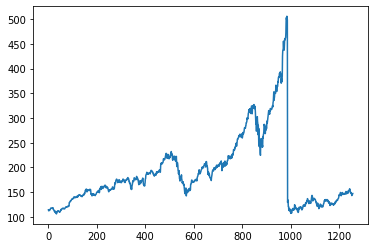

In [ ]:
#Plotting the 'close' values for visualization
import matplotlib.pyplot as plt
plt.plot(df2)

In [ ]:
#Scaling the data to  a range of (0,1) using MinMaxScaler or nomalizing the data for better prediction 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df2=sc.fit_transform(np.array(np.array(df2).reshape(-1,1)))

In [ ]:
df2

array([[0.02058045],
       [0.01615965],
       [0.01833258],
       ...,
       [0.10025476],
       [0.10270243],
       [0.10292722]])

In [ ]:
#Splitting the data into training data and test data ,about 2/3rd is training data and rest test data
train_size=int(len(df2)*0.65)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [ ]:
import numpy
#convert an array of values into a dataset  matrix
def create_dataset(dataset,time_step=1):
  data_x,data_y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i+time_step,0])
  return numpy.array(data_x),numpy.array(data_y)



In [ ]:
#Creating X_train,Y_train out of training data and X_test,Y_test out of test data with time_step=100 using the above function
time_step=100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.02058045 0.01615965 0.01833258 ... 0.07401718 0.07495379 0.07740147]
 [0.01615965 0.01833258 0.01700884 ... 0.07495379 0.07740147 0.0784255 ]
 [0.01833258 0.01700884 0.0182077  ... 0.07740147 0.0784255  0.07697687]
 ...
 [0.26807033 0.25655627 0.24554174 ... 0.43633548 0.43466207 0.43536141]
 [0.25655627 0.24554174 0.21886708 ... 0.43466207 0.43536141 0.43391278]
 [0.24554174 0.21886708 0.22800839 ... 0.43536141 0.43391278 0.44530196]]


In [ ]:
print(X_train.shape)
print(Y_train.shape)

(716, 100)
(716,)


In [ ]:
#reshape input to be [samples,timesteps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#Creating the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
#Create a sequential model to which layers can be added
model=Sequential()
#1st LSTM layer 
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
#2nd LSTM layer
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
#3rd LSTM layer
model.add(LSTM(50))
model.add(Dropout(0.2))
#Dense layer of dimension 1 for output
model.add(Dense(1))
#Compile the model using defined loss and optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
#Fitting the model 
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 307ms/step - loss: 0.0146 - val_loss: 0.0348
Epoch 2/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0033 - val_loss: 0.0265
Epoch 3/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0021 - val_loss: 0.0219
Epoch 4/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0012 - val_loss: 0.0221
Epoch 5/100
12/12 [==============================] - 2s 205ms/step - loss: 8.8167e-04 - val_loss: 0.0262
Epoch 6/100
12/12 [==============================] - 2s 202ms/step - loss: 9.5291e-04 - val_loss: 0.0245
Epoch 7/100
12/12 [==============================] - 2s 202ms/step - loss: 7.9676e-04 - val_loss: 0.0225
Epoch 8/100
12/12 [==============================] - 2s 204ms/step - loss: 8.9708e-04 - val_loss: 0.0212
Epoch 9/100
12/12 [==============================] - 2s 206ms/step - loss: 8.1359e-04 - val_loss: 0.0221
Epoch 10/100
12/12 [==============================] - 2s 205ms/step - l

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
#do prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transform back to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
#Of training data
math.sqrt(mean_squared_error(Y_train,train_predict))

189.4436212909275

In [ ]:
#Of test data
math.sqrt(mean_squared_error(Y_test,test_predict))

224.6055080767986

In [ ]:
#shift train predictions for plotting to align with the original dataset
look_back=100
train_predict_plot=numpy.empty_like(df2)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict

In [ ]:
#shift test predictions for plotting to align with the original dataset
test_predict_plot=numpy.empty_like(df2)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]=test_predict

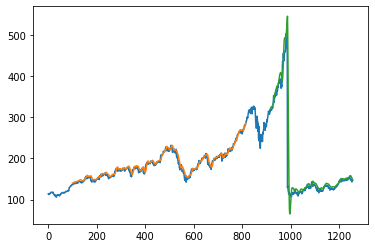

In [ ]:
#plot baseline and predictions
plt.plot(sc.inverse_transform(df2))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
#demonstrate prediction for next 30 days
from numpy import array
output=[]
n_steps=100
i=0
while (i<30):

  if (len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    output.extend(yhat.tolist())
    i=i+1
  


[0.10668696]
101
1 day input [0.06001798 0.06119187 0.05279984 0.05045207 0.04260952 0.0481043
 0.05429842 0.05135122 0.04780459 0.04740497 0.05394875 0.04925321
 0.05342425 0.05292472 0.05279984 0.04887857 0.04720516 0.04638094
 0.04832909 0.04453269 0.05040212 0.05042709 0.0525251  0.05349918
 0.0509516  0.05404865 0.06186623 0.05976822 0.06104201 0.06513812
 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499
 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885
 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026 0.10849693
 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275
 0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.

In [ ]:
#Assigning range of days to variables
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

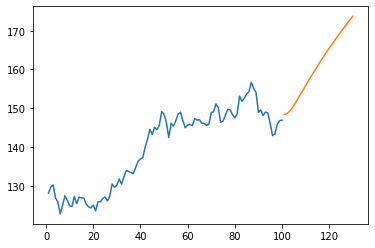

In [ ]:
#Converting back to original form and plotting the input and predicted data
plt.plot(day_new,sc.inverse_transform(df2[1157:]))
plt.plot(day_pred,sc.inverse_transform(output))

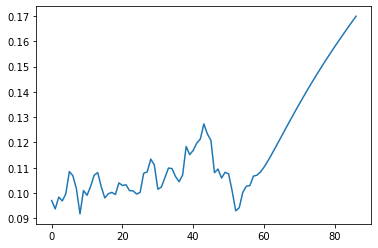

In [ ]:
#Combining the both datasets for plotting
df3=df2.tolist()
df3.extend(output)
plt.plot(df3[1200:])